In [1]:
import numpy as np
import scipy as sp
from scipy import linalg

from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator

from utils_decompose import ucry_decomposition_optimize, zyz_decomposition, global_phase_gate
from utils_block_encode import is_unitary, block_encode_matrix, transfer_matrix, abc_decomposition

from utils import universal_ud ,universal_cu_2, universal_be

In [2]:
rng = np.random.RandomState()

N = 2
M = rng.rand(N,N)*20-10 + (rng.rand(N,N)*20-10)*1j
R = np.linalg.norm(M)

if R > 1: 
    print("Original matirx:\n",np.round(M,3))
    print("-> divisor:",R)
    M = M/R

print("Matrix with norm < 1:\n",np.round(M,3))

Original matirx:
 [[-2.075-5.809j -9.982-0.92j ]
 [ 3.834+0.72j   7.037+2.007j]]
-> divisor: 14.398220908716155
Matrix with norm < 1:
 [[-0.144-0.403j -0.693-0.064j]
 [ 0.266+0.05j   0.489+0.139j]]


Unitary decomposition

Matrix:
 [[-0.144-0.403j -0.693-0.064j]
 [ 0.266+0.05j   0.489+0.139j]]
-> untary: False
Circuit matrix:
 [[-0.144-0.403j -0.693-0.064j -0.116-0.165j -0.346+0.414j]
 [ 0.266+0.05j   0.489+0.139j  0.087+0.103j -0.462+0.661j]
 [ 0.115-0.j     0.152-0.15j  -0.97 -0.j     0.   +0.j   ]
 [-0.854-0.j     0.328-0.322j  0.   -0.j    -0.243+0.j   ]]
-> untary: True


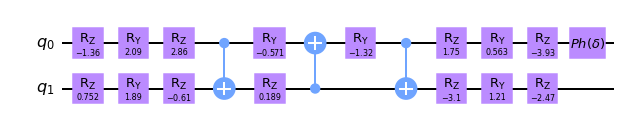

In [3]:
U, D, V = np.linalg.svd(M, full_matrices=True)
M_enlarge,U_enlarge,D_enlarge,V_enlarge = block_encode_matrix(M,U,D,V,N)

# print("Encoded matrix:\n",np.round(M_enlarge,3))
# print("-> untary:", is_unitary(M_enlarge))

# print("Decomposed matrix:\n",np.round(U_enlarge@D_enlarge@V_enlarge,3))
# print("-> untary:", is_unitary(U_enlarge@D_enlarge@V_enlarge))

qc = QuantumCircuit(N)
phase = 0

phase = universal_ud(qc,U_enlarge@D_enlarge@V_enlarge,[0,1],phase)
global_phase_gate(qc,phase,0)

print("Matrix:\n",np.round(M,3))
print("-> untary:", is_unitary(M))

print("Circuit matrix:\n",np.round(np.matrix(Operator(qc)),3))
print("-> untary:", is_unitary(Operator(qc)))
qc.draw(output="mpl",fold=-1)

Block encoding (control unitary)

Matrix:
 [[-0.144-0.403j -0.693-0.064j]
 [ 0.266+0.05j   0.489+0.139j]]
-> untary: False
Circuit matrix:
 [[-0.144-0.403j -0.693-0.064j  0.116+0.165j -0.346+0.414j]
 [ 0.266+0.05j   0.489+0.139j -0.087-0.103j -0.462+0.661j]
 [ 0.115+0.j     0.152-0.15j   0.97 +0.j    -0.   +0.j   ]
 [-0.854+0.j     0.328-0.322j  0.   +0.j    -0.243+0.j   ]]
-> untary: True


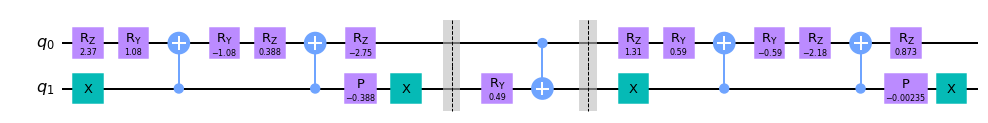

In [4]:
qc = QuantumCircuit(N)

qc.x(1)
abc_decomposition(qc,V,1,0)
qc.x(1)

qc.barrier()
# qc.z(1)
ucry_decomposition_optimize(qc,2,np.real(D_enlarge@transfer_matrix(N)),[0,1])
qc.barrier()

qc.x(1)
phase = abc_decomposition(qc,U,1,0)
qc.x(1)


print("Matrix:\n",np.round(M,3))
print("-> untary:", is_unitary(M))

print("Circuit matrix:\n",np.round(np.matrix(Operator(qc)),3))
print("-> untary:", is_unitary(Operator(qc)))
qc.draw(output="mpl",fold=-1)

Block encoding (control unitary as 2-qubit unitary)

Matrix:
 [[-0.144-0.403j -0.693-0.064j]
 [ 0.266+0.05j   0.489+0.139j]]
-> untary: False
Circuit matrix:
 [[-0.144-0.403j -0.693-0.064j  0.116+0.165j -0.346+0.414j]
 [ 0.266+0.05j   0.489+0.139j -0.087-0.103j -0.462+0.661j]
 [ 0.115+0.j     0.152-0.15j   0.97 +0.j    -0.   +0.j   ]
 [-0.854+0.j     0.328-0.322j -0.   +0.j    -0.243-0.j   ]]
-> untary: True


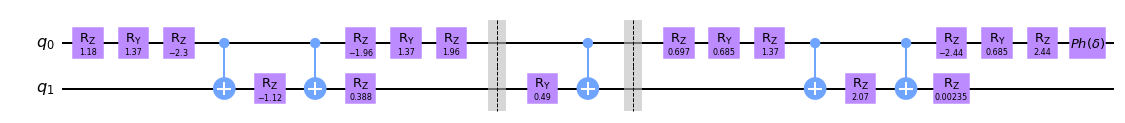

In [5]:
qc = QuantumCircuit(N)

phase = 0

phase = universal_cu_2(qc,V_enlarge,[0,1],phase)
qc.barrier()

# qc.z(N-1)
ucry_decomposition_optimize(qc,N,np.real(D_enlarge@transfer_matrix(N)),[0,1])

qc.barrier()
phase = universal_cu_2(qc,U_enlarge,[0,1],phase)

global_phase_gate(qc,phase,0)


print("Matrix:\n",np.round(M,3))
print("-> untary:", is_unitary(M))

print("Circuit matrix:\n",np.round(np.matrix(Operator(qc)),3))
print("-> untary:", is_unitary(Operator(qc)))
qc.draw(output="mpl",fold=-1)

Block encoding

Matrix:
 [[-0.144-0.403j -0.693-0.064j]
 [ 0.266+0.05j   0.489+0.139j]]
-> untary: False
Circuit matrix:
 [[-0.144-0.403j -0.693-0.064j  0.359-0.287j  0.195+0.287j]
 [ 0.266+0.05j   0.489+0.139j  0.365-0.631j -0.055+0.365j]
 [ 0.249-0.443j -0.154+0.223j -0.296-0.221j -0.704-0.191j]
 [ 0.448-0.533j  0.181+0.388j  0.063+0.341j  0.457-0.049j]]
-> untary: True


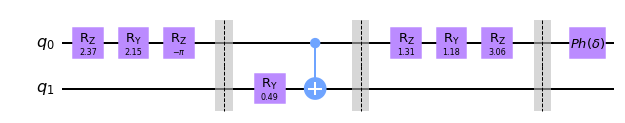

In [6]:
qc = QuantumCircuit(N)
phase = 0

phase = universal_ud(qc,V,range(N-1),phase)
qc.barrier()

ucry_decomposition_optimize(qc,N,np.real(D_enlarge@transfer_matrix(N)),range(N))

qc.barrier()
phase = universal_ud(qc,U,range(N-1),phase)

# phase = universal_be(qc,M,range(N),phase)

qc.barrier()
global_phase_gate(qc,phase,0)

print("Matrix:\n",np.round(M,3))
print("-> untary:", is_unitary(M))

print("Circuit matrix:\n",np.round(np.matrix(Operator(qc)),3))
print("-> untary:", is_unitary(Operator(qc)))
qc.draw(output="mpl",fold=-1)